# Agenda:
> - Introduction to Pandas Dataframe for Reading of CSV File
> - Reading TSV/CSV files in Pandas and making Graph from them
> - Making Sense of Nodes and Edges, Directed and Undirected Graph
> - Plots:
    - Degree Histogram for the Network
    - Degree Distribution for the Network
    - Clustering Co-efficient for the Network
    - Nearest Neighbour vs Degree for the Network

## Introduction to Pandas: Data Management Library with Python.
> -  DataFrame can be seen as a table of data, i.e. a single set of formatted two-dimensional data

In [1]:
import pandas as pd

### Manually Entering Data

In [2]:
test_dataFrame = pd.DataFrame(
                        {
                            "a_Integers":[1,2,3,4,5],
                            "b_Strings":["String1","String2","String3","String4","String5"],
                            "c_Floats":["0.1","1.2","0.3","0.4","0.5"]
                        }
                )
test_dataFrame

,a_Integers,b_Strings,c_Floats
0,1,String1,0.1
1,2,String2,1.2
2,3,String3,0.3
3,4,String4,0.4
4,5,String5,0.5


### Loading Data from CSV File into Pandas Dataframe

Link to FB ego network dataset.
http://konect.uni-koblenz.de/networks/ego-facebook

Download the dataset and understand it.

**Note**: Move the dataset to a folder named `resources` in the project root directory. Also, remove the first 2 lines from `out.ego-facebook` file.

In [3]:
# sep: the separateor in the File.
#header: the number of Rows you need to keep as Header and want to skip, can give multiple rows to skip[0,1]
facebookDf = pd.read_csv('resources/ego-facebook/out.ego-facebook', sep=' ', header=None)
facebookDf.head()

,0,1
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


## Making sense of this Data
### Metadata:
> - NODE: A node represents a user. 
> - EDGE: Left Node is a friend of the user represented by the right node.
> - Friend - User Relation : Name the Dataframe to remove confusion
> - Undirected Network


In [4]:
# facebookDf = facebookDf.rename(columns={'0': 'Friend', '1': 'User'})
facebookDf.columns = ['Friend', 'User']
facebookDf.head()

,Friend,User
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


### Other Basic Operations on Pandas Dataframe
    

In [5]:
print("Shape of Dataframe: ",facebookDf.shape,"\n") #Rows*Column
print("Print First x entries:")
facebookDf.head()

Shape of Dataframe:  (2981, 2) 

Print First x entries:


,Friend,User
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


# Using NetworkX Library for Plotting Network Graphs:
> - Degree Histogram
> - Degree Distribution
> - Clustering Co-efficient Distribution
> - Assortative/Disassortative Nature of Graph

In [6]:
import networkx as nx
import collections
import numpy as np
import operator
from IPython.display import display, Math, Latex

import matplotlib.pyplot as plt
%matplotlib inline  

#### Degree Historam:

In [7]:
# Function for Degree Histogram:
def plotDegreeHistogram(fbDeg,fbCnt):
    width = 0.35       # the width of the bars
    fig, ax = plt.subplots()
    ax.bar(fbDeg, fbCnt,width, color='#40a6d1')
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")

In [8]:
fbFrndGraph = nx.from_pandas_edgelist(facebookDf, 'Friend', 'User') #Make the Graph from Pandas Dataframe

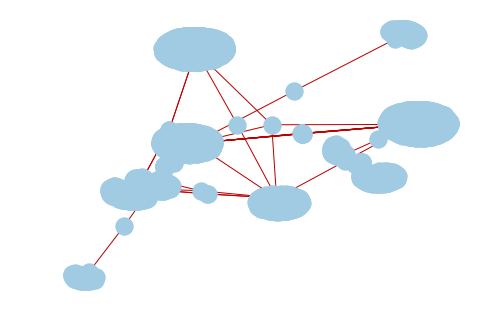

In [9]:
nx.spectral_layout(fbFrndGraph)
nx.draw(fbFrndGraph, node_color='#A0CBE2',edge_color='#BB0000',with_labels=False)

In [10]:
#Getting the Degree of all nodes: Dictionary Format ({1:1,2:3}) node:degree pairs
# fbFrndGraph.degree()
# len(fbFrndGraph.nodes())
# len(fbFrndGraph.edges())

Degrees for x-axis:  (1, 2, 3, 4, 55, 58, 97, 139, 170, 221, 287, 481, 710, 769) 
 Counts for y-axis (2790, 82, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)


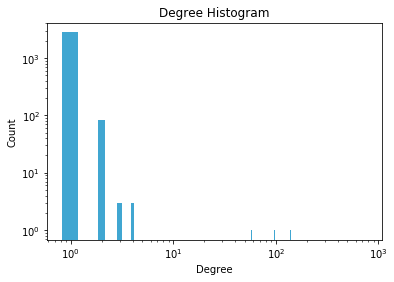

In [11]:
fb_degree_sequence = sorted([d for n, d in fbFrndGraph.degree()])  # Degree of all nodes [1,1.......x]
fbDegreeCount = collections.Counter(fb_degree_sequence) # Count of Degree of Nodes
fbDeg, fbCnt = zip(*fbDegreeCount.items()) #Tuples of (Degree,Count), * 

print("Degrees for x-axis: ",fbDeg,"\n","Counts for y-axis", fbCnt)

#For Plotting Degree Histogram:
plotDegreeHistogram(fbDeg,fbCnt)

### Degree Distribution:
> - it provides probability that a randomly selected node in the network has degree P_k.
> - p_k needs to be normalized.
> - p_k = N_k/N


In [12]:
def findDegreeDist(tempGraph):
    dictCount = dict()
    #**********degree of each node************
    kDegree = dict(tempGraph.degree())
    #**********List of all possible degrees*********
    kValues = sorted(set(kDegree.values())) #Sorted Degree Values
    for each in kDegree:
        temp = kDegree[each]
        if temp in dictCount.keys():#counting all n_k for n_k/N
            dictCount[temp]+=1
        else:
            dictCount[temp] = 1
    nodeDivide = nx.number_of_nodes(tempGraph)#value of N
    for i in range(max(dictCount.keys())+1):
        if i not in dictCount.keys():
            dictCount[i] = 0
    for each in dictCount.keys():#n_k/N values
        dictCount[each] = dictCount[each] / nodeDivide
    dictCount = collections.OrderedDict(sorted(dictCount.items()))
    x_axis = dictCount.keys()
    y_axis = dictCount.values()
    return x_axis,y_axis

In [13]:
k_xaxis,k_yaxis = findDegreeDist(fbFrndGraph)
#k_xaxis
# k_yaxis

Text(0.5,1,'Degree Dist. K')

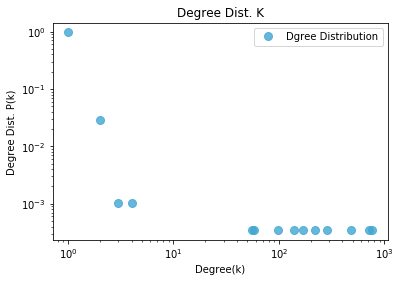

In [14]:
plt.figure()
plt.yscale('log')
plt.xscale('log')
plt.plot(k_xaxis,k_yaxis, label='Degree Distribution Graph',linewidth=0, marker='o',markersize=8, color='#40a6d1', alpha=.8)
plt.legend(['Dgree Distribution'])
plt.xlabel('Degree(k)')
plt.ylabel('Degree Dist. P(k)')
plt.title('Degree Dist. K')

> - Degree Distribution uses:
     - Functional Form of p(k) impacts many Network Phenomena, e.g Network Robustness, Spread of Viruses 

### Clustering Co-efficient:

In [15]:
# Function for Calculating Clustering Co-efficients:----
def clusteringCoeff(tempGraph):
    degClusDict = dict()
    for eachNode in tempGraph.nodes():
        degClusDict[eachNode] = (tempGraph.degree(eachNode),nx.clustering(tempGraph,eachNode))
#         print(type(degClusDict[eachNode]))
    final_Dict = dict()
#     print(degClusDict)
    for key in degClusDict.keys():
        if degClusDict[key][0] in final_Dict:
#             print(degClusDict[key][1])
            final_Dict[degClusDict[key][0]].append(degClusDict[key][1])
        else:
            final_Dict[degClusDict[key][0]] = [degClusDict[key][1]]
#     print(final_Dict)
    for key in final_Dict:
        final_Dict[key] = float(sum(final_Dict[key]))/len(final_Dict[key])
    return final_Dict

In [16]:
k_Ck = clusteringCoeff(fbFrndGraph)
# k_Ck

In [17]:
#Calculating x-axis and y-axis for Plotting Graph
def getXYAxis(temp_Ck,maxDegree):
    plot_Ck_y = []
    plot_k_x = []
    for i in range(maxDegree+1):
        plot_k_x.append(i)
        if i in temp_Ck:
            plot_Ck_y.append(temp_Ck[i])
        else:
            plot_Ck_y.append(float(0)) 
    return plot_k_x,plot_Ck_y

In [18]:
k_maxDegree = max(k_Ck.items(), key=operator.itemgetter(0))[0]
k_plot_Ck_x,k_plot_Ck_y = getXYAxis(k_Ck,k_maxDegree)

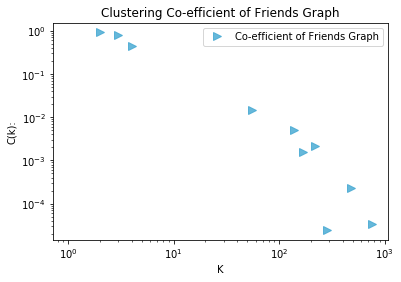

In [19]:
plt.yscale('log')
plt.xscale('log')
plt.plot(k_plot_Ck_x, k_plot_Ck_y, label='Clustering Coefficient Graph',linewidth=0, marker='>',markersize=8, color='#40a6d1', alpha=.8)
plt.title("Clustering Co-efficient of Friends Graph")
plt.ylabel("C(k):")
plt.xlabel("K")
plt.legend(['Co-efficient of Friends Graph'],loc = 'upper right')

### Assortativity of Network:

In [20]:
asrt_k = nx.k_nearest_neighbors(fbFrndGraph)
maxAssrt = max(asrt_k.items(), key=operator.itemgetter(0))[0]
asrt_k

{287: 2.7038327526132404,
 1: 527.4229390681004,
 2: 237.4268292682927,
 3: 258.77777777777777,
 4: 445.75,
 481: 3.997920997920998,
 710: 1.0140845070422535,
 769: 1.6423927178153446,
 221: 4.049773755656108,
 139: 6.410071942446043,
 97: 1.0103092783505154,
 55: 4.490909090909091,
 58: 1.0172413793103448,
 170: 1.4470588235294117}

In [21]:
asrt_k_x_axis,asrt_k_y_axis = getXYAxis(asrt_k,maxAssrt)

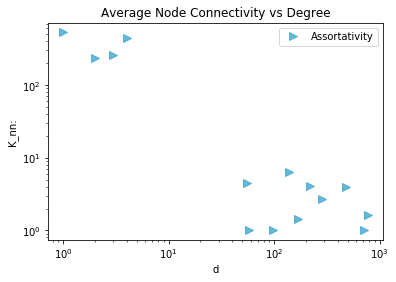

In [22]:
plt.yscale('log')
plt.xscale('log')
plt.plot(asrt_k_x_axis, asrt_k_y_axis, label='Assortavity of Graph',linewidth=0, marker='>',markersize=8, color='#40a6d1', alpha=.8)
plt.title("Average Node Connectivity vs Degree")
plt.ylabel("K_nn:")
plt.xlabel("d")
plt.legend(['Assortativity'])

<b> - Disassortative Network : Hubs tend to connect to small degree nodes